In [46]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [47]:
ch=pd.read_csv('Churn_Modelling.csv')
ch

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [48]:
ch.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [49]:
inch=ch[['Gender','Age','Tenure','Balance','CreditScore','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [50]:
inch['Gender']=inch['Gender'].map({'Female':0,'Male':1})

C:\Users\Kaila\AppData\Local\Temp\ipykernel_18068\1582706875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inch['Gender']=inch['Gender'].map({'Female':0,'Male':1})


In [51]:
uni=inch[['Gender','Age','Tenure','Balance','CreditScore','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].apply(lambda x : x.unique())
uni

Gender                                                        [0, 1]
Age                [42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...
Tenure                            [2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]
Balance            [0.0, 83807.86, 159660.8, 125510.82, 113755.78...
CreditScore        [619, 608, 502, 699, 850, 645, 822, 376, 501, ...
NumOfProducts                                           [1, 3, 2, 4]
HasCrCard                                                     [1, 0]
IsActiveMember                                                [1, 0]
EstimatedSalary    [101348.88, 112542.58, 113931.57, 93826.63, 79...
dtype: object

In [52]:
type=inch[['Gender','Age','Tenure','Balance','CreditScore','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].apply(lambda x: x.dtype)
type

Gender               int64
Age                  int64
Tenure               int64
Balance            float64
CreditScore          int64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [53]:
inch.shape

(10000, 9)

In [54]:
from sklearn.metrics import confusion_matrix,classification_report
def model(x,y):
    x = x[:y.shape[0]]
    model = keras.Sequential([
        keras.layers.Dense(50,input_shape=(9,),activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(x,y,epochs=5)
    return model

In [55]:
ouch=ch['Exited']

In [56]:
ouch.shape

(10000,)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train ,Y_text= train_test_split(inch,ouch, test_size=0.2, random_state=42)

In [58]:
X_train.shape

(8000, 9)

In [59]:
Y_train.shape

(8000,)

In [60]:
model= model(X_train,Y_train)

c:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6481 - loss: 623.1497
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - loss: 68.9345
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6871 - loss: 55.7687
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - loss: 47.8536
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6756 - loss: 55.9943


In [61]:
model.evaluate(X_test,Y_text)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7464 - loss: 19.5236  


[18.25577735900879, 0.7595000267028809]

In [62]:
y_pred=model.predict(X_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[0.0000000e+00],
       [0.0000000e+00],
       [3.3051853e-29],
       ...,
       [5.4720700e-16],
       [0.0000000e+00],
       [3.9531760e-15]], dtype=float32)

In [63]:
Y_text.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [64]:
y_pred=(y_pred>0.5).astype(int)
print(classification_report(Y_text.tolist(),y_pred.tolist()))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1607
           1       0.29      0.16      0.20       393

    accuracy                           0.76      2000
   macro avg       0.55      0.53      0.53      2000
weighted avg       0.71      0.76      0.73      2000



this artificial neural network that we used the current model is not so good but we can make it good by balancing the dataset
for that we need four methods
undersampling
oversampling
smote
ensemble methods


**UNDERSAMPLING**

In [65]:
ouch.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [66]:
new=pd.concat([inch,ouch],axis=0)
new

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0,42.0,2.0,0.00,619.0,1.0,1.0,1.0,101348.88,NaN
1,0.0,41.0,1.0,83807.86,608.0,1.0,0.0,1.0,112542.58,NaN
2,0.0,42.0,8.0,159660.80,502.0,3.0,1.0,0.0,113931.57,NaN
3,0.0,39.0,1.0,0.00,699.0,2.0,0.0,0.0,93826.63,NaN
4,0.0,43.0,2.0,125510.82,850.0,1.0,1.0,1.0,79084.10,NaN
...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [67]:
new0=new[new['Exited']==0]
new0

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [68]:
new0

,Gender,Age,Tenure,Balance,CreditScore,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [69]:
new1=new[new['Exited']==1]

In [70]:
new1.shape

(2037, 10)

In [71]:
new0=new0.sample(2037)

In [72]:
new0.shape

(2037, 10)

In [73]:
inn=pd.concat([new0,new1],axis=1)

CNN is here

In [74]:
(X_train,Y_train),(X_test,Y_text)=keras.datasets.cifar10.load_data()

In [75]:
X_train.shape

(50000, 32, 32, 3)

In [76]:
Y_train.shape

(50000, 1)

In [77]:
classes=['airplane',										
'automobile',									
'bird',										
'cat',										
'deer',									
'dog',										
'frog',										
'horse',									
'ship',										
'truck']

In [78]:
def show_image(x,y,index):
    plt.imshow(x[index])
    plt.title('Label: {}'.format(classes[y[index][0]]))
    plt.show()

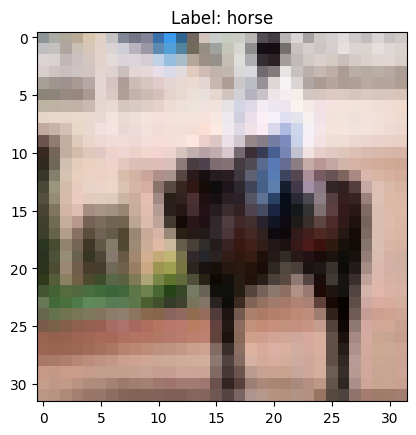

In [79]:
show_image(X_train,Y_train,11)

first ann here then cnn

In [80]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

c:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [82]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1759 - loss: 24.9920
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2130 - loss: 2.4676
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2677 - loss: 2.0138
Epoch 4/5
 937/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2690 - loss: 1.9835

KeyboardInterrupt: 

In [ ]:
pred=model.predict(X_test)
pred=[np.argmax(x) for x in pred]
Y_text

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
print(classification_report(Y_text,pred))

              precision    recall  f1-score   support

           0       0.18      0.56      0.28      1000
           1       0.13      0.09      0.10      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.16      0.92      0.27      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.17      0.06      0.09      1000

    accuracy                           0.16     10000
   macro avg       0.06      0.16      0.07     10000
weighted avg       0.06      0.16      0.07     10000



c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

"HERE COMES CNN"

In [ ]:
cnn= keras.Sequential([
    #cnn
    keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2913 - loss: 3.1295
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4987 - loss: 1.4141
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5776 - loss: 1.2056
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6345 - loss: 1.0565
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6707 - loss: 0.9510
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6903 - loss: 0.8863
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7198 - loss: 0.8099
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7402 - loss: 0.7625
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7522 - loss: 0.7101
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7650 - loss: 0.6683


In [ ]:
cnn.evaluate(X_test,Y_text)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6397 - loss: 1.1612


[1.1662927865982056, 0.6378999948501587]

In [ ]:
pre=model.predict(X_test)
pre=[np.argmax(x) for x in pre]
pre

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[6,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 6,
 0,
 0,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 0,
 1,
 6,
 6,
 6,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 1,
 6,
 1,
 6,
 0,
 0,
 6,
 0,
 6,
 6,
 0,
 1,
 6,
 6,
 0,
 0,
 6,
 0,
 1,
 6,
 6,
 6,
 6,
 9,
 6,
 6,
 0,
 0,
 6,
 0,
 6,
 6,
 0,
 0,
 1,
 6,
 1,
 0,
 6,
 0,
 0,
 9,
 6,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 0,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 9,
 6,
 0,
 0,
 6,
 6,
 0,
 6,
 1,
 6,
 0,
 6,
 0,
 1,
 6,
 6,
 6,
 0,
 0,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 6,
 0,
 6,
 0,
 0,
 6,
 6,
 6,
 6,
 0,
 0,
 1,
 0,
 9,
 6,
 6,
 6,
 0,
 6,
 0,
 1,
 1,
 6,
 6,
 0,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 6,
 6,
 0,
 0,
 6,
 6,
 9,
 6,
 0,
 6,
 6,
 6,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 9,
 6,
 0,
 0,
 6,
 0,
 6,
 0,
 6,
 6,
 0,
 6,
 0,
 1,
 1,
 1,
 6,
 1,
 0,
 1,
 6,
 6,
 6,
 0,
 6,
 6,
 1,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 0,
 0,
 6,
 0,
 6,
 6,
 0,
 0,
 1,
 0,
 0,
 6,
 6,
 1,
 6,
 1,


In [ ]:
print(classification_report(Y_text,pre))

              precision    recall  f1-score   support

           0       0.18      0.56      0.28      1000
           1       0.13      0.09      0.10      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.16      0.92      0.27      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.17      0.06      0.09      1000

    accuracy                           0.16     10000
   macro avg       0.06      0.16      0.07     10000
weighted avg       0.06      0.16      0.07     10000



c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

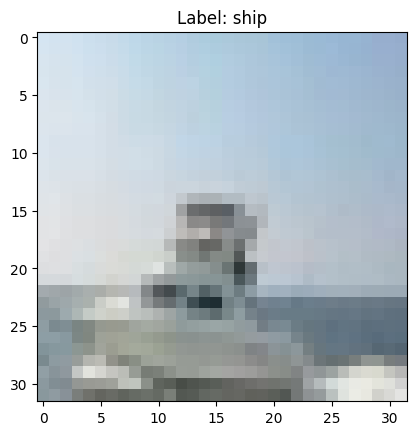

In [ ]:
show_image(X_train,Y_train,100)

In [ ]:
y=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
classes[np.argmax(y[14])]

'truck'

In [ ]:
show_image(X_test,Y_text,14)

NameError: name 'show_image' is not defined

In [ ]:
from tensorflow import keras
import cv2
import PIL
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [ ]:
path = keras.utils.get_file('flower_photos', origin=url,cache_dir='.' ,untar=True)
path

'.\\datasets\\flower_photos'

In [ ]:
dir1=pathlib.Path(path)
dir1

WindowsPath('datasets/flower_photos')

In [ ]:
l=list(dir1.glob('**/*.jpg'))

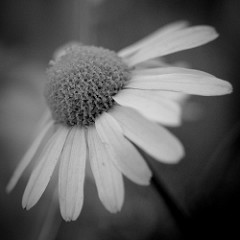

In [ ]:
PIL.Image.open(str(l[9]))

In [ ]:
list(dir1.glob('*/daisy/*'))

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos

In [ ]:
flower_dict={
    'daisy':list(dir1.glob('*/daisy/*')),
    'dandelion':list(dir1.glob('*/dandelion/*')),
    'roses':list(dir1.glob('*/roses/*')),
    'sunflowers':list(dir1.glob('*/sunflowers/*')),
    'tulips':list(dir1.glob('*/tulips/*'))
}

In [ ]:
flower_label={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
x,y=[],[]
for name ,flower in flower_dict.items():
    for image in flower:
        im=cv2.imread(str(image))
        im=cv2.resize(im,(180,180))
        x.append(im)
        y.append(flower_label[name])


In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_text = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train.shape

(2936, 180, 180, 3)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(64,input_shape=(180,180,3),kernel_size=(3,3),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(5, activation='softmax')

])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
16/92 ━━━━━━━━━━━━━━━━━━━━ 1:26 1s/step - accuracy: 0.2626 - loss: 4.6669

KeyboardInterrupt: 

You should consider upgrading via the 'C:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\python.exe -m pip install --upgrade pip' command.


In [ ]:
from tensorflow import keras 
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vartai=['arumai','super da', 'sirapu','nalla iruku','nallathu','chi','moosam','kevelam','worst da','bad']
unarvu=[1,1,1,1,1,0,0,0,0,0]

In [ ]:
vocab_count=30

In [ ]:
vartaikal=[one_hot(v,vocab_count) for v in vartai]
vartaikal

[[12], [9, 16], [4], [23, 9], [29], [20], [26], [8], [26, 16], [2]]

In [ ]:
max_count=2

In [ ]:
vartaikal=pad_sequences(vartaikal,max_count)
vartaikal

array([[ 0, 12],
       [ 9, 16],
       [ 0,  4],
       [23,  9],
       [ 0, 29],
       [ 0, 20],
       [ 0, 26],
       [ 0,  8],
       [26, 16],
       [ 0,  2]])

In [ ]:
x=vartaikal
y=np.array(unarvu)

In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_count,5,input_length=max_count,name='embeddings_constraint'),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\Kaila\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])   
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4000 - loss: 0.6977
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4000 - loss: 0.6967
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.4000 - loss: 0.6957
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.4000 - loss: 0.6948
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.4000 - loss: 0.6938


In [ ]:
model.evaluate(x,y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.5000 - loss: 0.6928


[0.6928099393844604, 0.5]

In [ ]:
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


1

"gensim for word2vec here"

In [ ]:
!pip install gensim

  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2


You should consider upgrading via the 'C:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\python.exe -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd


df=pd.read_csv('xor.csv')
X = df[['X1','X2','X3']]

y = df['Y']

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu')) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))            

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\Kaila\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.fit(X, y, epochs=10, verbose=0)


In [ ]:
predictions = model.predict(X)
predictions=(predictions>0.5).astype('int')
predictions



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
model.evaluate(X,y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7500 - loss: 0.6549


[0.6548510789871216, 0.75]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.67      1.00      0.80         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



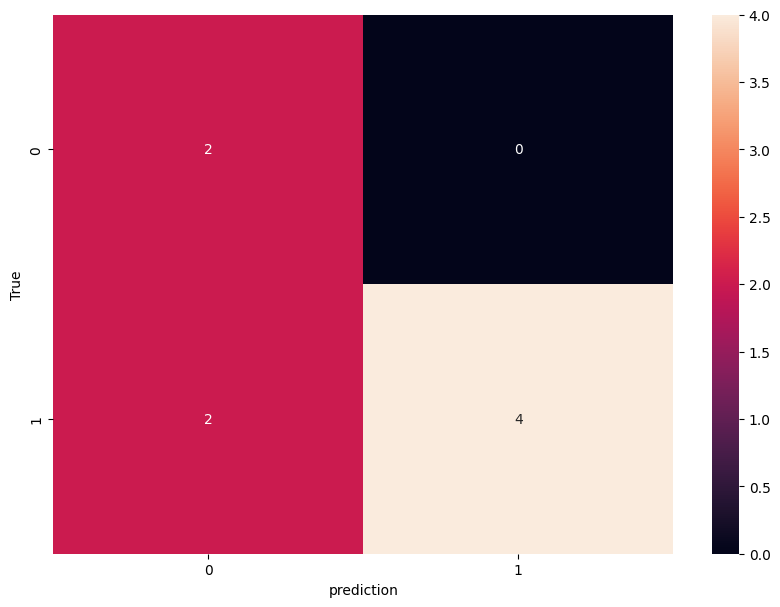

In [ ]:
import matplotlib.pyplot as plt
cm=confusion_matrix(predictions,y)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('prediction')
plt.ylabel('True')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

# Simulated sequential data: 100 samples, 10 time steps, 8 features
X = np.random.randn(100, 10, 8)
y = np.random.randint(0, 2, size=(100, 1))  # binary classification


In [ ]:
X

array([[[-1.17602210e+00,  5.91551852e-01, -6.38600072e-01, ...,
          1.73993462e+00, -2.21832418e+00, -1.40299648e+00],
        [ 1.25013316e-02,  8.30677436e-02, -1.23926588e+00, ...,
          6.28912386e-01, -1.18446983e+00, -1.30831356e+00],
        [ 7.47731943e-02,  1.27593997e+00, -7.60281409e-01, ...,
         -4.48776246e-01, -3.37459276e-01, -7.68111253e-01],
        ...,
        [ 1.11466102e+00,  5.64862328e-01, -1.18470806e-01, ...,
         -6.85782726e-02,  6.27321116e-01, -8.51369036e-01],
        [ 5.61547757e-02, -9.91172495e-01, -6.01379893e-01, ...,
         -5.15425060e-01,  1.14265251e+00, -1.32400978e-01],
        [-3.18744657e-01, -5.61943112e-01, -2.67499196e-01, ...,
          8.57961938e-01, -1.63127826e+00, -1.57035973e+00]],

       [[ 3.57117062e-01, -1.85809824e+00,  1.52091949e+00, ...,
         -5.75042911e-01, -2.28864450e-01, -7.56647981e-01],
        [-5.91145181e-01,  8.44253451e-01,  5.41052717e-01, ...,
          1.41247166e+00, -1.63291112e

In [ ]:
y

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [ ]:
# RNN Model
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, activation='tanh', input_shape=(10, 8)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X, y, epochs=5, batch_size=16)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4992 - loss: 0.7784
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5654 - loss: 0.7104 
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6042 - loss: 0.6779 
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6575 - loss: 0.6457 
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5958 - loss: 0.6694 


In [ ]:
# LSTM Model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(10, 8)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X, y, epochs=5, batch_size=16)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4843 - loss: 0.7025
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5129 - loss: 0.6927
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5315 - loss: 0.6815
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5680 - loss: 0.6804
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6659 - loss: 0.6655


In [ ]:
# GRU Model
gru_model = tf.keras.Sequential([
    tf.keras.layers.GRU(32, input_shape=(10, 8)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.fit(X, y, epochs=5, batch_size=16)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6154 - loss: 0.6619
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5887 - loss: 0.6668
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6230 - loss: 0.6613
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6443 - loss: 0.6471
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6428 - loss: 0.6380


In [132]:
import pandas as pd
import numpy as np
hr=pd.read_csv('heart.csv')

In [133]:
hr[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].iloc[0]


age          52.0
sex           1.0
cp            0.0
trestbps    125.0
chol        212.0
fbs           0.0
restecg       1.0
thalach     168.0
exang         0.0
oldpeak       1.0
slope         2.0
ca            2.0
thal          3.0
target        0.0
Name: 0, dtype: float64

In [134]:
hr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [135]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [136]:
hr.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

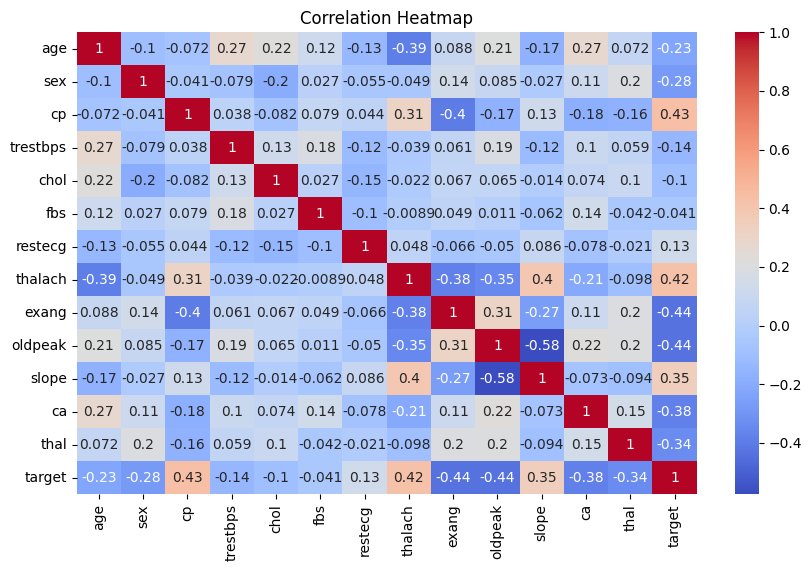

In [137]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(hr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [140]:
corr_matrix = hr.corr()

for i in hr.columns:
    
    if i != 'target' and abs(corr_matrix[i]['target']) <= 0.2:
        hr.drop(i, axis=1, inplace=True)


In [141]:
hr['age'][0:10]

0    52
1    53
2    70
3    61
4    62
5    58
6    58
7    55
8    46
9    54
Name: age, dtype: int64

C:\Users\Kaila\AppData\Local\Temp\ipykernel_18068\3789611437.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


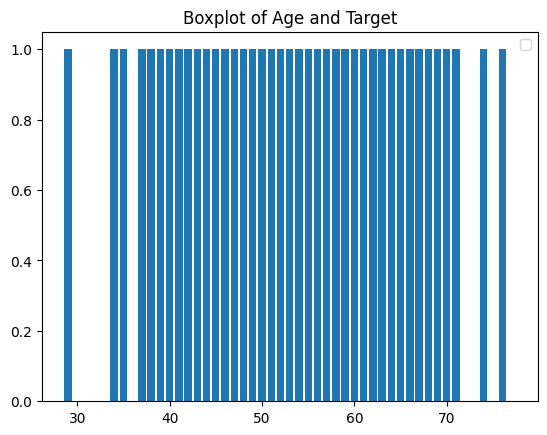

In [142]:
plt.bar(hr['age'],hr['target']
        )
plt.title('Boxplot of Age and Target')
plt.legend()
plt.show()

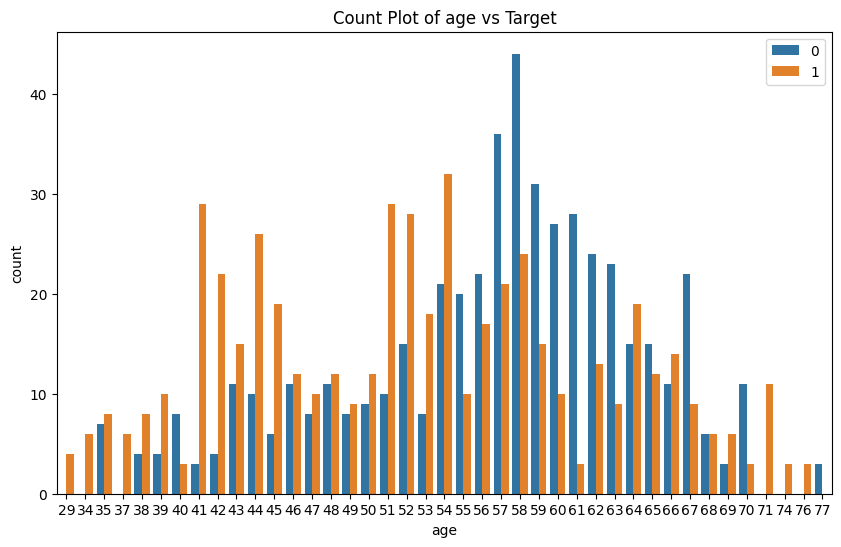

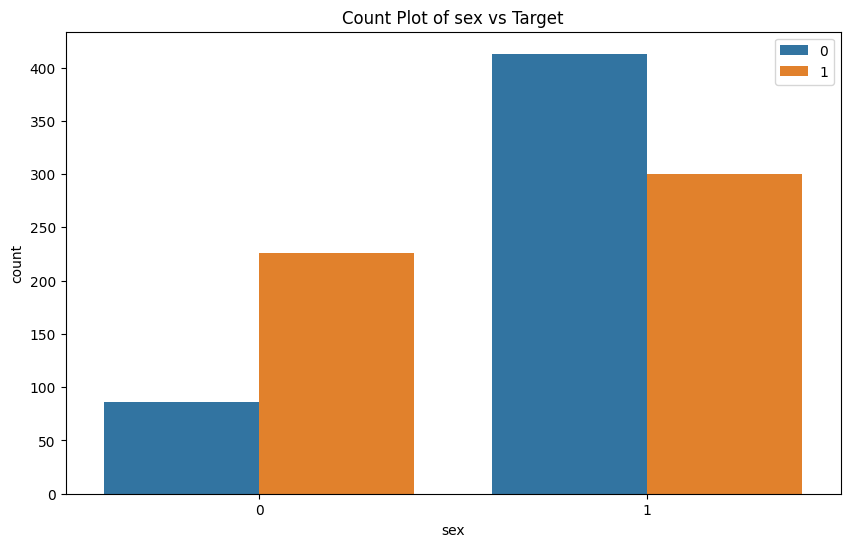

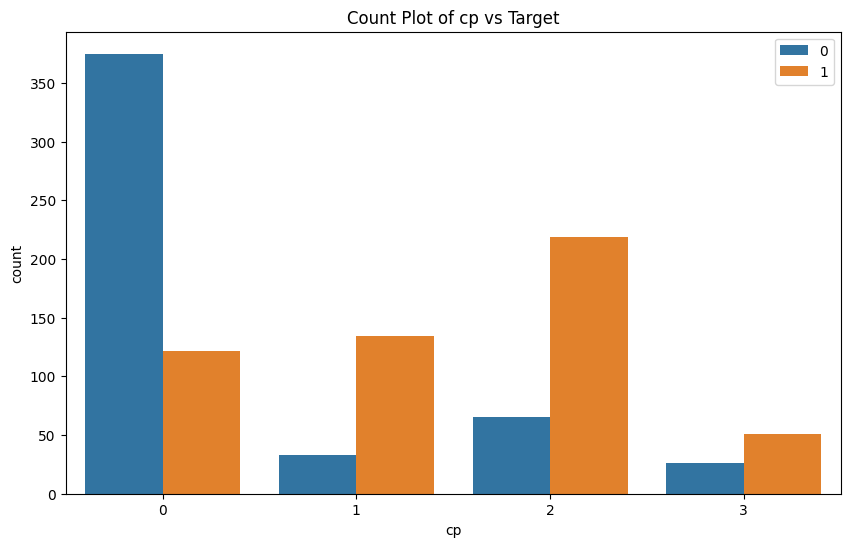

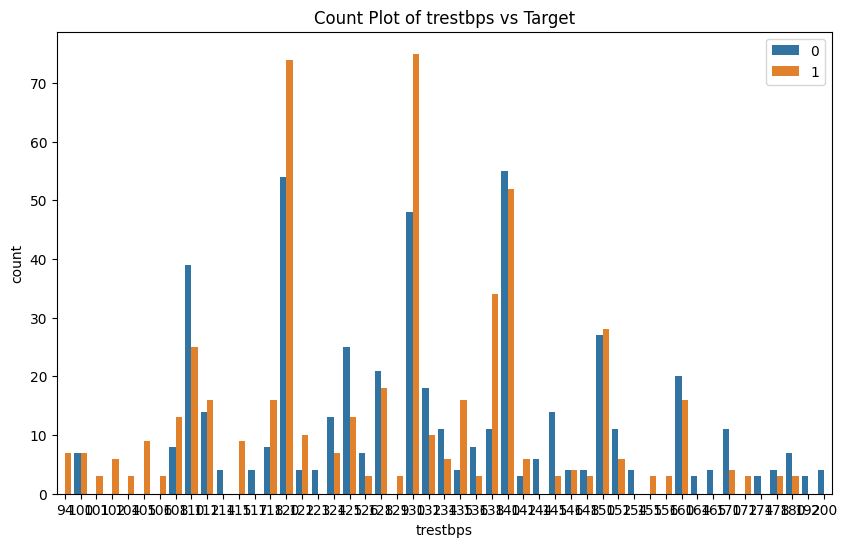

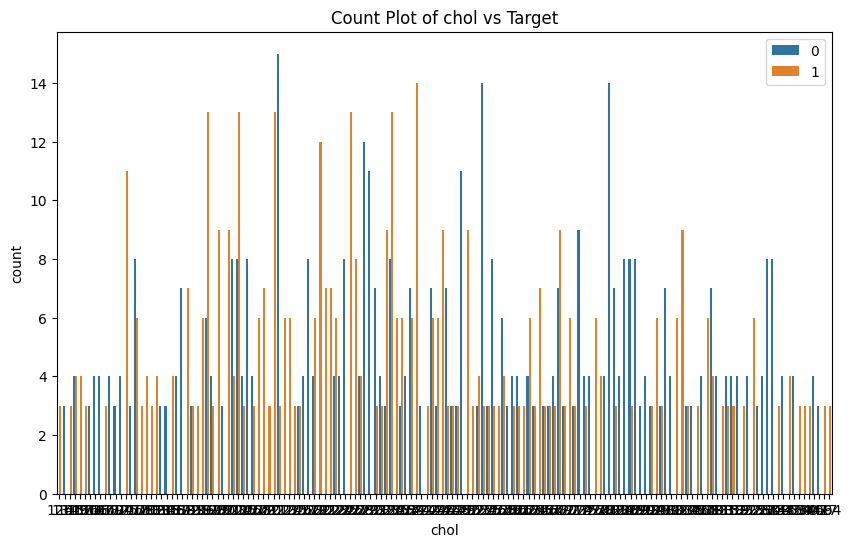

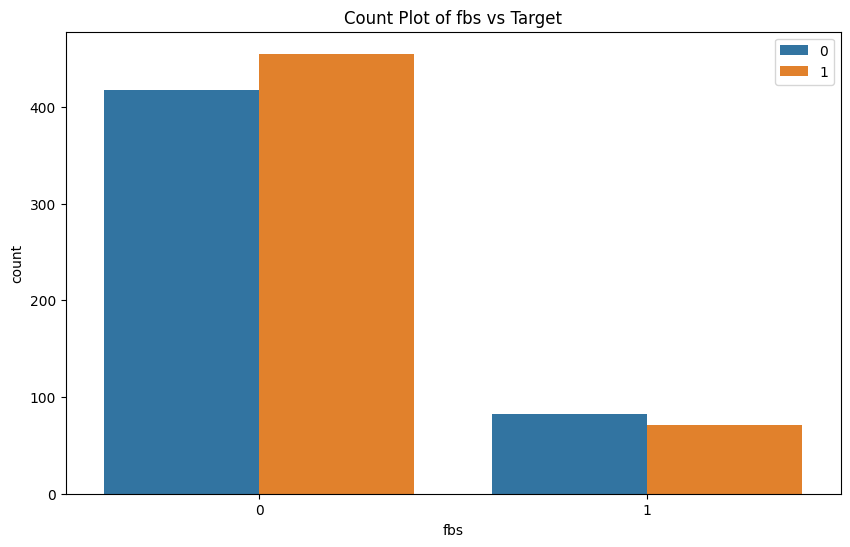

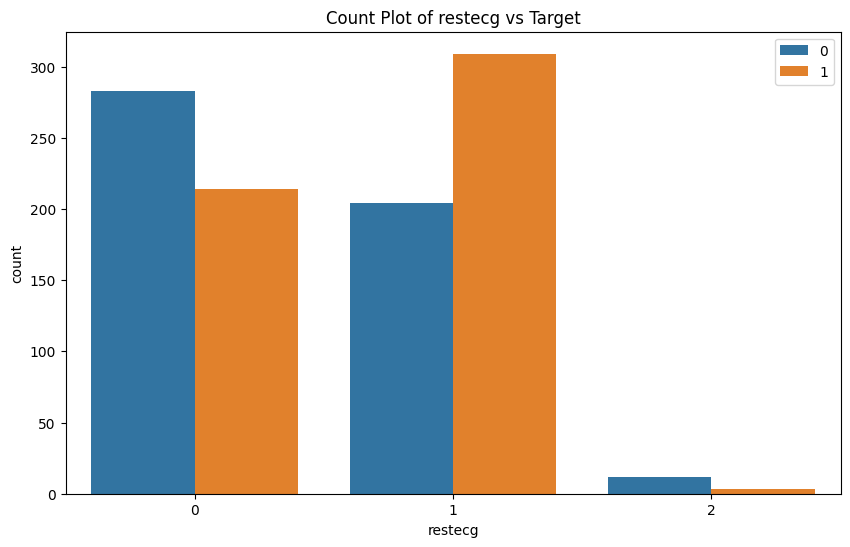

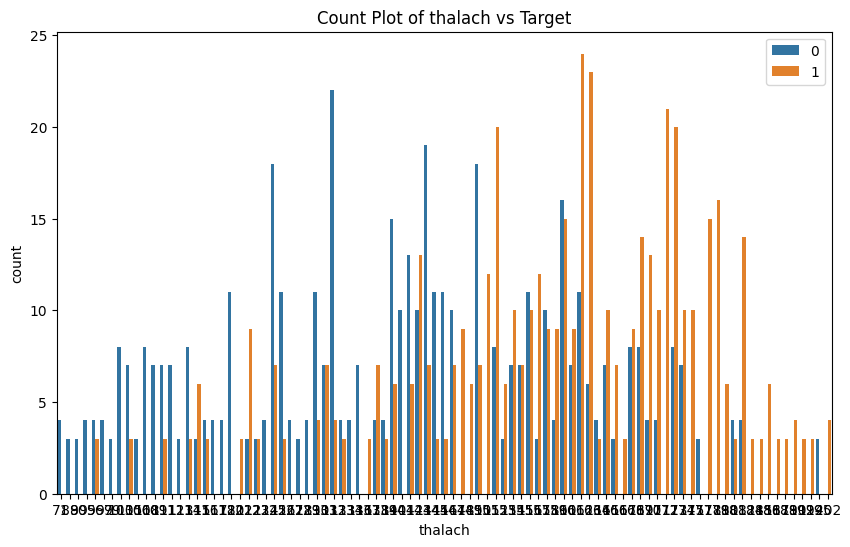

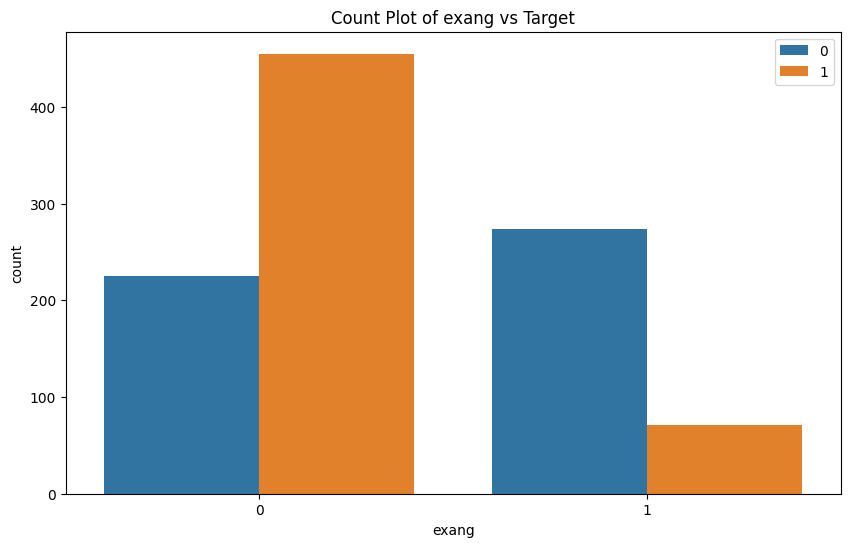

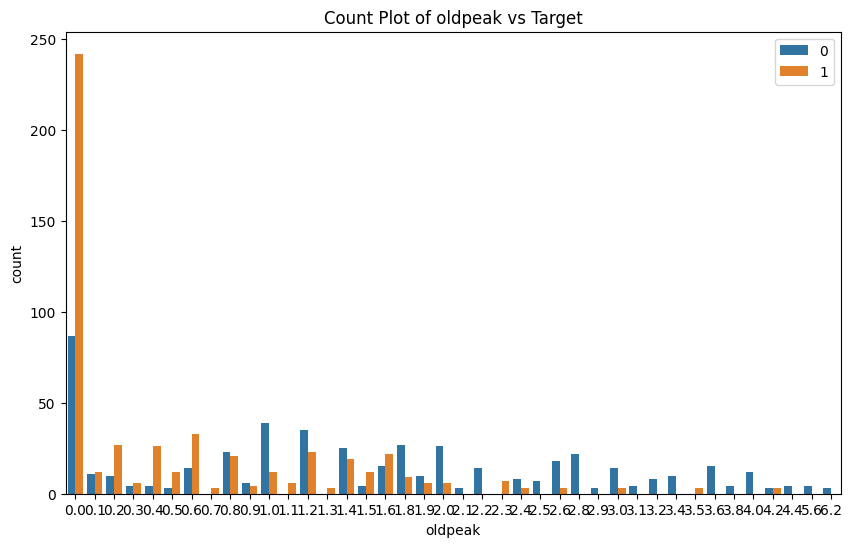

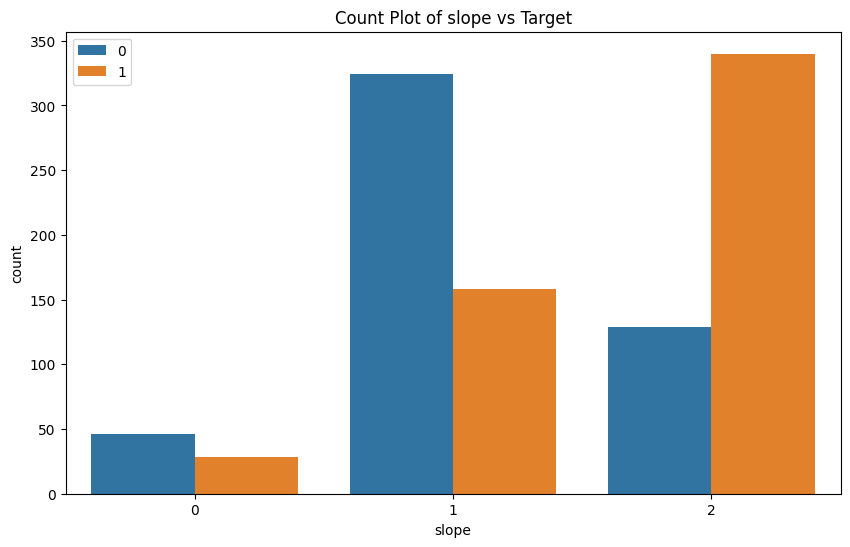

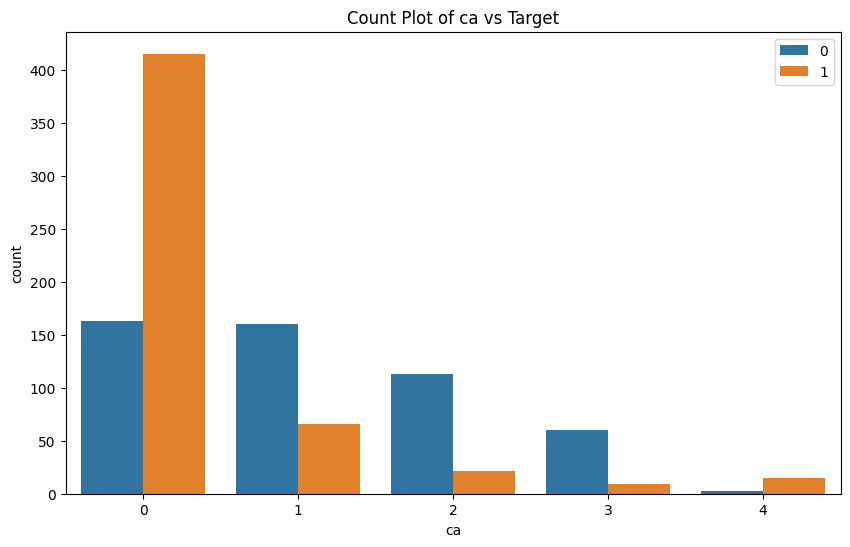

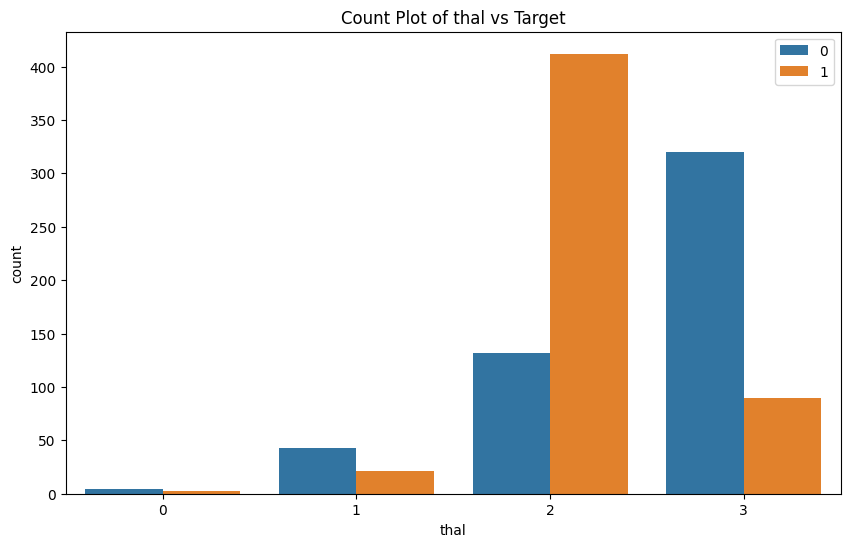

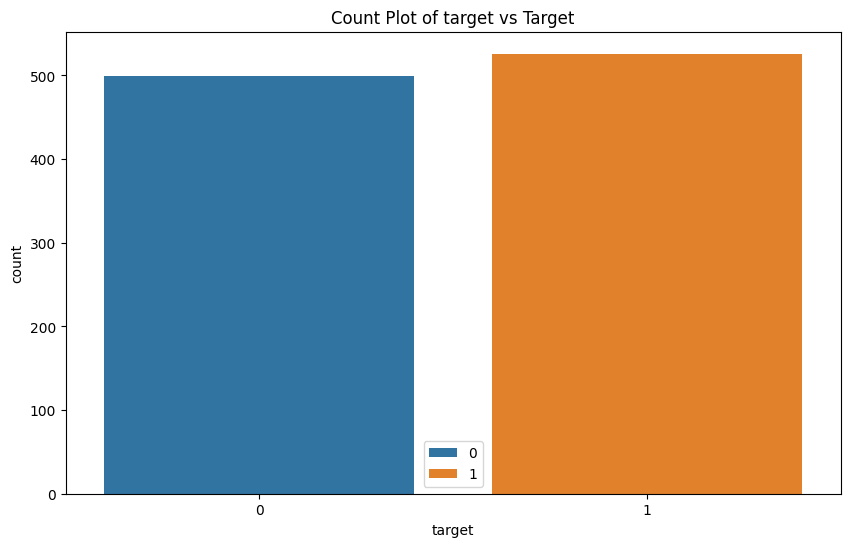

In [91]:
for i in hr.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=hr[i], hue=hr['target'])
    plt.title(f'Count Plot of {i} vs Target')
    plt.legend()
    plt.show()

In [144]:
hr.columns

Index(['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target'],
      dtype='object')

In [145]:
hr[['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target']].iloc[0]


age         52.0
sex          1.0
cp           0.0
thalach    168.0
exang        0.0
oldpeak      1.0
slope        2.0
ca           2.0
thal         3.0
target       0.0
Name: 0, dtype: float64

In [147]:
zeros=[]
ones=[]


for i in range(len(hr)):
    if hr['target'][i] == 0:
        zeros.append(hr[['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target']].iloc[i]
)
    else:
        ones.append(hr[['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target']].iloc[i]
)

In [148]:
zeros=np.array(zeros)
zeros.shape

(499, 10)

In [149]:
ones=np.array(ones)
ones.shape

(526, 10)

In [160]:
ones=pd.DataFrame(ones,columns=hr.columns)
ones=ones[0:499]
ones

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0
1,71.0,0.0,0.0,125.0,0.0,1.6,1.0,0.0,2.0,1.0
2,34.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0
3,34.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0
4,51.0,0.0,2.0,142.0,0.0,1.5,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
494,58.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0
495,52.0,1.0,0.0,147.0,0.0,0.1,2.0,3.0,3.0,1.0
496,44.0,0.0,2.0,175.0,0.0,0.6,1.0,0.0,2.0,1.0
497,76.0,0.0,2.0,116.0,0.0,1.1,1.0,0.0,2.0,1.0


In [163]:
zeros=pd.DataFrame(zeros,columns=hr.columns)

In [164]:
hr=pd.concat([ones,zeros],axis=0)

In [169]:
hr

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0
1,71.0,0.0,0.0,125.0,0.0,1.6,1.0,0.0,2.0,1.0
2,34.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0
3,34.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0
4,51.0,0.0,2.0,142.0,0.0,1.5,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
494,53.0,1.0,0.0,95.0,1.0,2.0,1.0,2.0,3.0,0.0
495,41.0,1.0,0.0,158.0,0.0,0.0,2.0,0.0,3.0,0.0
496,60.0,1.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
497,47.0,1.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0


In [171]:

Q1 = hr.quantile(0.25)
Q3 = hr.quantile(0.75)
IQR = Q3 - Q1

print("IQR values:\n", IQR)


df_no_outliers = hr[~((hr < (Q1 - 1.5 * IQR)) | (hr > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nOriginal shape:", hr.shape)
print("Shape after removing outliers:", df_no_outliers.shape)


IQR values:
 age        13.0
sex         1.0
cp          2.0
thalach    33.0
exang       1.0
oldpeak     1.8
slope       1.0
ca          1.0
thal        1.0
target      1.0
dtype: float64

Original shape: (998, 10)
Shape after removing outliers: (899, 10)


In [172]:
hr

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0
1,71.0,0.0,0.0,125.0,0.0,1.6,1.0,0.0,2.0,1.0
2,34.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0
3,34.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0
4,51.0,0.0,2.0,142.0,0.0,1.5,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
494,53.0,1.0,0.0,95.0,1.0,2.0,1.0,2.0,3.0,0.0
495,41.0,1.0,0.0,158.0,0.0,0.0,2.0,0.0,3.0,0.0
496,60.0,1.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
497,47.0,1.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0


<Axes: >

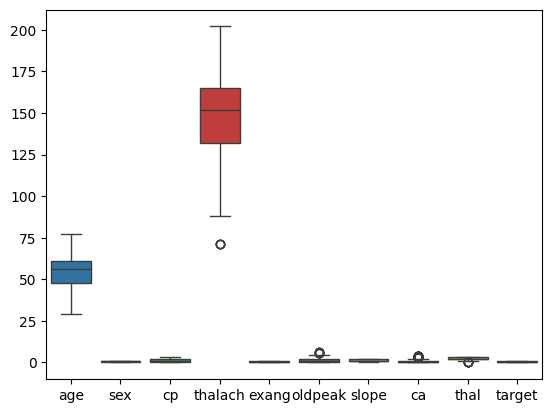

In [181]:
sns.boxplot(hr)

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0
1,71.0,0.0,0.0,125.0,0.0,1.6,1.0,0.0,2.0,1.0
2,34.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0
3,34.0,0.0,1.0,192.0,0.0,0.7,2.0,0.0,2.0,1.0
4,51.0,0.0,2.0,142.0,0.0,1.5,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
494,58.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0
495,52.0,1.0,0.0,147.0,0.0,0.1,2.0,3.0,3.0,1.0
496,44.0,0.0,2.0,175.0,0.0,0.6,1.0,0.0,2.0,1.0
497,76.0,0.0,2.0,116.0,0.0,1.1,1.0,0.0,2.0,1.0
